# **Problem Statement** :)- Food Delivery Time Prediction

# Description:
**To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.**

# 1. Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# 2. Dataset Information
**The dataset you are given here is a cleaned version of the original dataset submitted by Gaurav Malik on Kaggle. Below are all the features in the dataset:**
* [DataSet Link (Click Me::)](https://statso.io/food-delivery-time-prediction-case-study/)

# 2.1 Dataset Feature
1. ID: order ID number 
2. Delivery_person_ID: ID number of the delivery partner
3. Delivery_person_Age: Age of the delivery partner
4. Delivery_person_Ratings: ratings of the delivery partner based on past 5. deliveries
6. Restaurant_latitude: The latitude of the restaurant
7. Restaurant_longitude: The longitude of the restaurant
8. Delivery_location_latitude: The latitude of the delivery location
9. Delivery_location_longitude: The longitude of the delivery location
10. Type_of_order: The type of meal ordered by the customer
11. Type_of_vehicle: The type of vehicle delivery partner rides
12. Time_taken(min): The time taken by the delivery partner to complete the order









# 2.3 Reading Dataset 

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_PROJECT/FOOD_DELIVERY_TIME_PREDICTION/deliverytime.txt")
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


# 2.4 Data Exploration

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [61]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


# 2.5 Null Value

In [62]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

**The dataset does not have any null values. Let’s move further!**

# 3. Calculating Distance Between Two Latitudes and Longitudes

**The dataset doesn’t have any feature that shows the difference between the restaurant and the delivery location. All we have are the latitude and longitude points of the restaurant and the delivery location. We can use the haversine formula to calculate the distance between two locations based on their latitudes and longitudes.**

## Harversine Formula


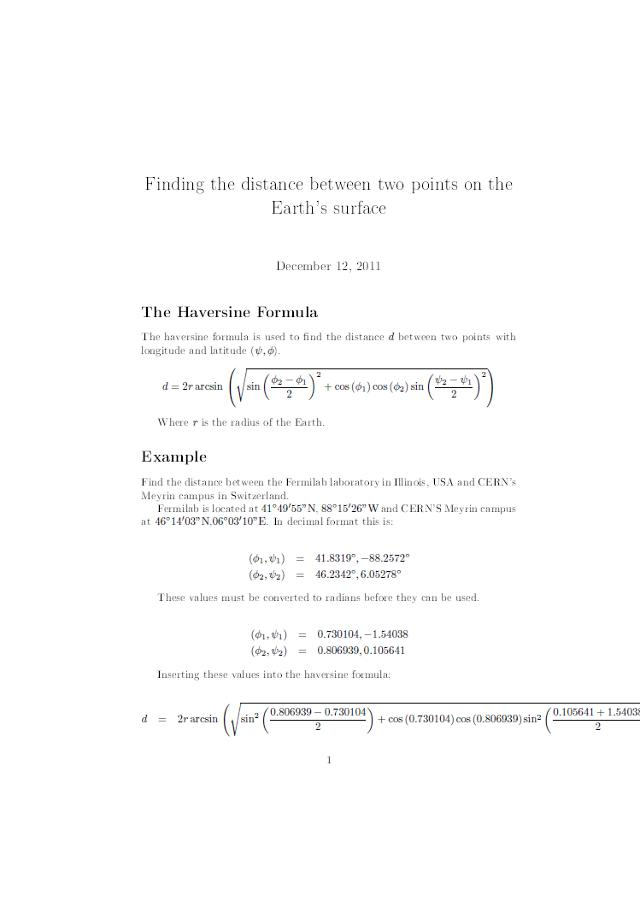

In [63]:
# set earth raduis(in K.M)
r=6371
# convert degree to radians
def deg_to_rad(degree):
  return degree*(np.pi/180)

# function to calaculate distance between two point
def dist_calculate(lat1,lon1,lat2,lon2):
  d_lat=deg_to_rad(lat2-lat1) # difference b/w two latitiude
  d_lon=deg_to_rad(lon2-lon1) # diffrenece b/w two longitude
  # usign above formula
  x=np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))* np.cos(deg_to_rad(lat2) ) * np.sin(d_lon/2)**2
  y=2*np.arctan2(np.sqrt(x),np.sqrt(1-x))
  return r*y

# calculate distance between eah pair of points
data['distance']=np.nan

for i in range(len(data)):
  data.loc[i,'distance']=dist_calculate(data.loc[i,'Restaurant_latitude'],
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

**We have now calculated the distance between the restaurant and the delivery location. We have also added a new feature in the dataset as distance. Let’s look at the dataset again:**

In [64]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


# 4. Data Visualization

In [65]:
data.columns.unique()

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)', 'distance'],
      dtype='object')

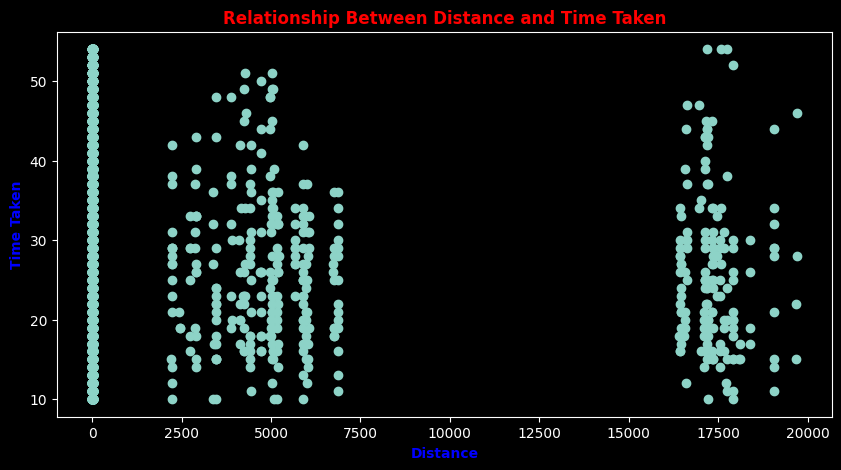

In [66]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.figure(figsize=(10,5))
plt.scatter(x=data['distance'],y=data['Time_taken(min)'])
plt.title("Relationship Between Distance and Time Taken",weight='bold',color='red')
plt.xlabel("Distance",weight='bold',color='blue')
plt.ylabel("Time Taken",weight='bold',color='blue')
plt.show()

* **There is a consistent relationship between the time taken and the distance travelled to deliver the food. It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.**

* **Now let’s have a look at the relationship between the time taken to deliver the food and the age of the delivery partner:**

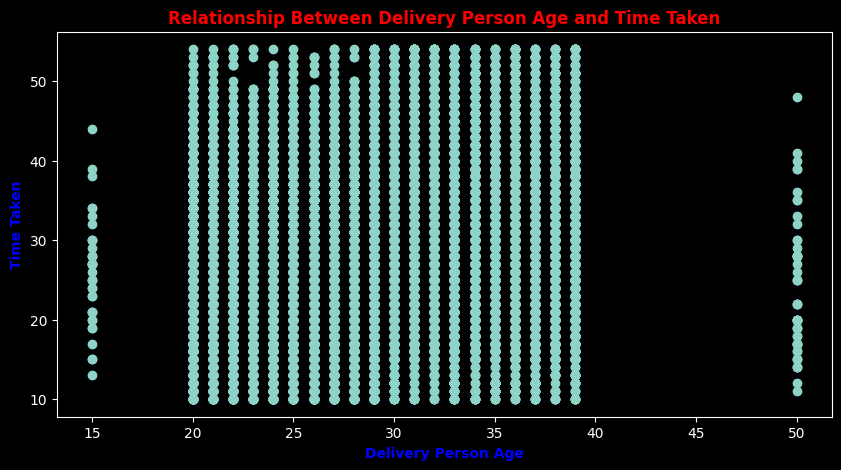

In [67]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.figure(figsize=(10,5))
plt.scatter(x=data['Delivery_person_Age'],y=data['Time_taken(min)'])
plt.title("Relationship Between Delivery Person Age and Time Taken",weight='bold',color='red')
plt.xlabel("Delivery Person Age",weight='bold',color='blue')
plt.ylabel("Time Taken",weight='bold',color='blue')
plt.show()

* **There is a linear relationship between the time taken to deliver the food and the age of the delivery partner. It means young delivery partners take less time to deliver the food compared to the elder partners.**

* **Now let’s have a look at the relationship between the time taken to deliver the food and the ratings of the delivery partner:**

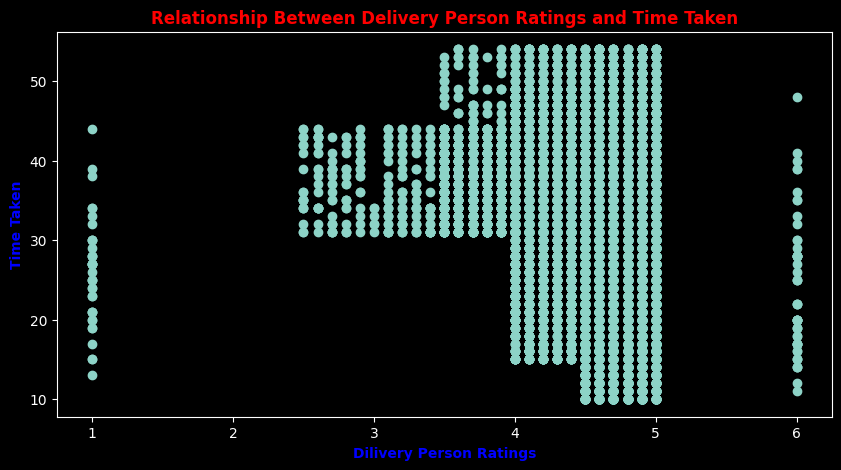

In [68]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.figure(figsize=(10,5))
plt.scatter(x=data['Delivery_person_Ratings'],y=data['Time_taken(min)'])
plt.title("Relationship Between Delivery Person Ratings and Time Taken",weight='bold',color='red')
plt.xlabel("Dilivery Person Ratings",weight='bold',color='blue')
plt.ylabel("Time Taken",weight='bold',color='blue')
plt.show()

* **There is an inverse linear relationship between the time taken to deliver the food and the ratings of the delivery partner. It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.**

* **Now let’s have a look if the type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not:**

<Figure size 1000x500 with 0 Axes>

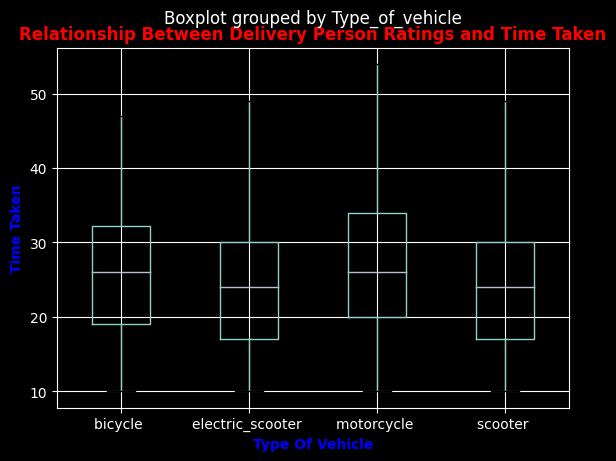

In [69]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
bp = data.boxplot(column=['Time_taken(min)'], by='Type_of_vehicle',ax=ax , showfliers=False)
# Set colors for each box
#colors = ['red', 'green', 'blue']
#for i, box in enumerate(bp['boxes']):
 #   box.set(facecolor=colors[i])
plt.title("Relationship Between Delivery Person Ratings and Time Taken",weight='bold',color='red')
plt.xlabel("Type Of Vehicle",weight='bold',color='blue')
plt.ylabel("Time Taken",weight='bold',color='blue')
plt.show()

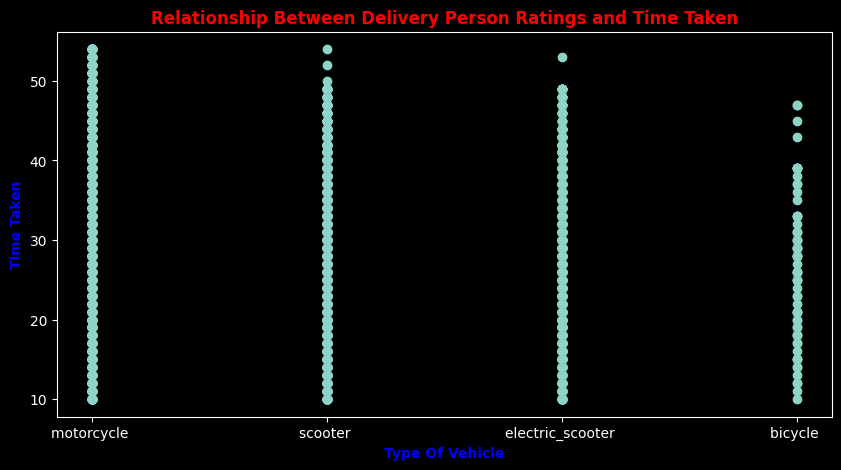

In [70]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.figure(figsize=(10,5))
plt.scatter(x=data['Type_of_vehicle'],y=data['Time_taken(min)'])

plt.title("Relationship Between Delivery Person Ratings and Time Taken",weight='bold',color='red')
plt.xlabel("Type Of Vehicle",weight='bold',color='blue')
plt.ylabel("Time Taken",weight='bold',color='blue')
plt.show()

* **So there is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.**

#### So the features that contribute most to the food delivery time based on our analysis are:

* **age of the delivery partner**
* **ratings of the delivery partner**
* **distance between the restaurant and the delivery location**

# 5. Model Training

In [71]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "distance"]])
y = np.array(data[["Time_taken(min)"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [72]:
# creating the LSTM neural network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [73]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 [==============================] - 229s 5ms/step - loss: 69.2354
Epoch 2/9
41033/41033 [==============================] - 219s 5ms/step - loss: 63.8000
Epoch 3/9
41033/41033 [==============================] - 222s 5ms/step - loss: 61.1632
Epoch 4/9
41033/41033 [==============================] - 220s 5ms/step - loss: 60.8064
Epoch 5/9
41033/41033 [==============================] - 221s 5ms/step - loss: 60.3719
Epoch 6/9
41033/41033 [==============================] - 224s 5ms/step - loss: 60.1123
Epoch 7/9
41033/41033 [==============================] - 219s 5ms/step - loss: 59.5761
Epoch 8/9
41033/41033 [==============================] - 219s 5ms/step - loss: 59.2000
Epoch 9/9
41033/41033 [==============================] - 224s 5ms/step - loss: 58.8433


# 6. **Testing Model**
* **Now let’s test the performance of our model by giving inputs to predict the food delivery time:**

In [75]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 29
Ratings of Previous Deliveries: 2.9
Total Distance: 6
1/1 [==============================] - 1s 781ms/step
Predicted Delivery Time in Minutes =  [[36.173397]]


* **So this is how you can use Machine Learning for the task of food delivery time prediction using the Python programming language.**

# Summary
**To predict the food delivery time in real time, you need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, you need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance. I hope you liked this article on food delivery time prediction with Machine Learning using Python. Feel free to ask valuable questions in the comments section below.**

# Reference:
* [Aman Kharwal](https://amankharwal.medium.com/)
* [Google.com](https://www.google.com/)
* [Wikipedia](https://www.wikipedia.org/)
* [Kaggle](https://www.kaggle.com/)